## Dataset generation from deformable mirror and GRIN fiber

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from mmfsim.grid import Grid
from mmfsim.fiber import StepIndexFiber
from mmfsim.datasets import SimulatedStepIndexSpeckleOutputDataset

In [2]:
grid = Grid(pixel_size=0.25e-6, pixel_numbers=(256,256))
fiber = StepIndexFiber(radius=26e-6, wavelength=532e-9, n1=1.465, n2=1.445)
print(fiber)

c:\users\saucourt\coding\mmf_lp_modes\mmfsim\fiber.py:176: RuntimeWarning: invalid value encountered in divide
  return sp.jv(n, u) / (u * sp.jv(n - 1, u)) + sp.kn(n, w) / (w * sp.kn(n - 1, w))
c:\users\saucourt\coding\mmf_lp_modes\mmfsim\fiber.py:175: RuntimeWarning: invalid value encountered in sqrt
  w = np.sqrt(v**2 - u**2)


StepIndexFiber instance with:
  - Radius: 26.0 um
  - Core index: 1.465
  - Cladding index: 1.445
  - Wavelength: 532.0 nm
  - Numerical aperture: 0.241
  - Number of guided LP modes: 699
  - Number of guided LP modes (counting degenerates): 1374
  - First 10 LP_n,m modes characteristics:
  n_eff      h          n          m
[[ 1.46497962  0.          0.          1.        ]
 [ 1.46494826  2.          1.          1.        ]
 [ 1.46490706  4.          2.          1.        ]
 [ 1.46489263  1.          0.          2.        ]
 [ 1.46485656  6.          3.          1.        ]
 [ 1.46482656  3.          1.          2.        ]
 [ 1.46479709  8.          4.          1.        ]
 [ 1.46475034  5.          2.          2.        ]
 [ 1.46473611  2.          0.          3.        ]
 [ 1.46472887 10.          5.          1.        ]]


In [3]:
dset = SimulatedStepIndexSpeckleOutputDataset(fiber, grid, length=11000, N_modes=fiber._N_modes_degen, degen=True, noise_std=0/100)
dset.compute_from_transfer_matrix(phases_dim=(30,30))

Found 168 input variable weights below threshold 0.0001 to delete.
Successfully deleted low weight input variables.
Computed TM row 1/732
Computed TM row 2/732
Computed TM row 3/732
Computed TM row 4/732
Computed TM row 5/732
Computed TM row 6/732
Computed TM row 7/732
Computed TM row 8/732
Computed TM row 9/732
Computed TM row 10/732
Computed TM row 11/732
Computed TM row 12/732
Computed TM row 13/732
Computed TM row 14/732
Computed TM row 15/732
Computed TM row 16/732
Computed TM row 17/732
Computed TM row 18/732
Computed TM row 19/732
Computed TM row 20/732
Computed TM row 21/732
Computed TM row 22/732
Computed TM row 23/732
Computed TM row 24/732
Computed TM row 25/732
Computed TM row 26/732
Computed TM row 27/732
Computed TM row 28/732
Computed TM row 29/732
Computed TM row 30/732
Computed TM row 31/732
Computed TM row 32/732
Computed TM row 33/732
Computed TM row 34/732
Computed TM row 35/732
Computed TM row 36/732
Computed TM row 37/732
Computed TM row 38/732
Computed TM row 39/

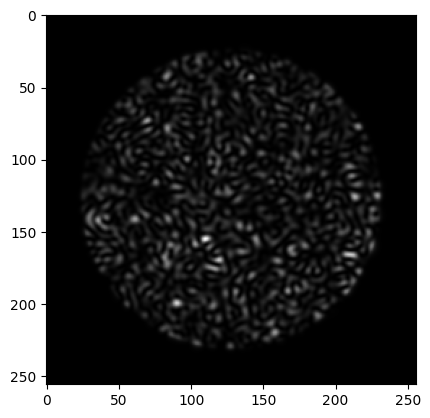

In [6]:
plt.imshow(dset.intensities[...,1], cmap='gray')

In [11]:
dset.compute_fourier_transforms(pad=1)

Computed Fourier 1/11000
Computed Fourier 2/11000
Computed Fourier 3/11000
Computed Fourier 4/11000
Computed Fourier 5/11000
Computed Fourier 6/11000
Computed Fourier 7/11000
Computed Fourier 8/11000
Computed Fourier 9/11000
Computed Fourier 10/11000
Computed Fourier 11/11000
Computed Fourier 12/11000
Computed Fourier 13/11000
Computed Fourier 14/11000
Computed Fourier 15/11000
Computed Fourier 16/11000
Computed Fourier 17/11000
Computed Fourier 18/11000
Computed Fourier 19/11000
Computed Fourier 20/11000
Computed Fourier 21/11000
Computed Fourier 22/11000
Computed Fourier 23/11000
Computed Fourier 24/11000
Computed Fourier 25/11000
Computed Fourier 26/11000
Computed Fourier 27/11000
Computed Fourier 28/11000
Computed Fourier 29/11000
Computed Fourier 30/11000
Computed Fourier 31/11000
Computed Fourier 32/11000
Computed Fourier 33/11000
Computed Fourier 34/11000
Computed Fourier 35/11000
Computed Fourier 36/11000
Computed Fourier 37/11000
Computed Fourier 38/11000
Computed Fourier 39/1

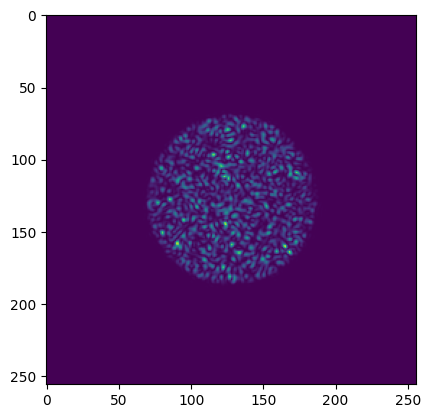

In [12]:
plt.imshow(np.square(np.abs(dset._transf[...,2])))

In [15]:
# dset.export(return_output_fields=True, add_exp_noise=False, noise_func=np.max, file_type='matlab')
dset.export(return_output_fields=True, add_exp_noise=True, noise_func=np.max, file_type='numpy')

OverflowError: serializing a bytes object larger than 4 GiB requires pickle protocol 4 or higher